<a href="https://colab.research.google.com/github/bogdanlalu/tensorflow/blob/master/NLP/05_(draft)_Train_on_BBC_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-05-20 13:40:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  19.6MB/s    in 0.2s    

2020-05-20 13:40:48 (19.6 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
!head /tmp/bbc-text.csv -n3

category,text
tech,tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bein

In [0]:
!cat /tmp/bbc-text.csv | wc -l

2226


In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [0]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [0]:
!wget --no-check-certificate \
    http://mlg.ucd.ie/files/datasets/stopwords.txt \
    -O stopwords.txt

--2020-05-20 13:39:26--  http://mlg.ucd.ie/files/datasets/stopwords.txt
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1780 (1.7K) [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]   1.74K  --.-KB/s    in 0s      

2020-05-20 13:39:27 (222 MB/s) - ‘stopwords.txt’ saved [1780/1780]



In [0]:
with open('stopwords.txt', 'r') as f:
  words = f.readlines()

stopwords300 = [w.replace('\n', '') for w in words]
print(len(stopwords300), " stopwords")

300  stopwords


In [0]:
def clean_chars(sentences):
  """Removes special characters from a list of sentences."""
  special_chars = r'.!@£$%^&*()_+"={}[]:"|;\<>?,./`~`'
  parsed_sentences = []

  # go through each sentence
  # go through each char
  # check if char is not part of special_chars and if so, append it to a list of clean chars
  # join this list of clean chars to create words
  # append this list of words (clean sentence) to the list of new sentences which will be returned

  for sentence in sentences:
    clean_chars = []

    for char in sentence:
      if char not in special_chars:
        clean_chars.append(char)
  
    clean_sentence = ''.join(clean_chars)  # space is already a clean char
    parsed_sentences.append(clean_sentence)
  
  return parsed_sentences

In [0]:
def remove_stop_words(sentences, stopwords=['']):
  parsed_sentences = []

  for sentence in sentences:
    parsed_words = []

    for word in sentence.split(' '):
      if word.lower() not in stopwords:
        parsed_words.append(word.lower())

    parsed_sentence = ' '.join(parsed_words)
    parsed_sentence = parsed_sentence.replace ("  ", " ")
    parsed_sentences.append(parsed_sentence)

  return parsed_sentences

In [0]:
def get_num_words(corpus):
  sum = 0
  for document in corpus:
    sum += len(document.split(' '))
  print(sum)

In [0]:
with open("/tmp/bbc-text.csv", 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
      labels.append(row['category'])
      sentences.append(row['text'])


sentences_clean_chars = clean_chars(sentences)
sentences = remove_stop_words(sentences_clean_chars, stopwords=stopwords300)

print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time expert panel gathered annual consumer electronics show las vegas discuss technologies impact one favourite pastimes leading trend programmes content delivered viewers home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked-about technologies ces digital personal video recorders dvr pvr set-top boxes s tivo uk s sky system allow people record store play pause forward wind tv programmes want essentially technology allows personalised tv built-in high-definition tv sets big business japan slower take europe lack high-definition programming people forward wind adverts forget abiding network channel schedules putting a-la-carte entertainment networks cable satellite companies worried means terms advertising revenues brand identity viewer loyalty channel

In [0]:
# num words in complete sentences
get_num_words(sentences)

476726


In [0]:
# num words in sentences without stopwords
get_num_words(sentences)

476726


In [0]:
def train_test_split(sentences, labels, pct_train, shuffle=False, seed=None):
  
  size = int(pct_train * len(sentences))

  if shuffle==True:

    import random
    random.seed(seed)
    idx = list(range(len(sentences)))
    random.shuffle(idx)
    sentences = [sentences[i] for i in idx]
    labels    = [labels[i] for i in idx] 

  training_sentences = sentences[:size]
  training_labels    = np.array(labels[:size])

  testing_sentences  = sentences[size:]
  testing_labels     = np.array(labels[size:])

  print("train data:", len(training_sentences), len(training_labels))
  print("testing data:", len(testing_sentences), len(testing_labels))

  return training_sentences,training_labels, testing_sentences, testing_labels

In [0]:
train_size = .8

train_sentences, train_labels, validation_sentences, validation_labels = train_test_split(sentences, 
                                                                                          labels, 
                                                                                          pct_train = 0.80, 
                                                                                          shuffle=True, 
                                                                                          seed=3)

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

train data: 1780 1780
testing data: 445 445
0.8
1780
1780
445
445


In [0]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [0]:
import pandas as pd

In [0]:
s = pd.Series(train_labels)

In [0]:
s.value_counts(normalize=True)

sport            0.234270
business         0.230899
politics         0.182022
tech             0.178652
entertainment    0.174157
dtype: float64

In [0]:
for i in range(15):
  print(train_sentences[i], "\t", train_labels[i])
print("-" * 50)

for i in range(15):
  print(validation_sentences[i], "\t", validation_labels[i])

george michael perform bbc george michael perform live london s abbey road studios part bbc radio 2 special month session broadcast 18 december see talk biggest hits came michael s appearance part station s sold song initiative explores art songwriting station confirmed chris tarrant hosting one-off year s eve programme left london s capital fm year 17 years former breakfast show host - attracted highest ratings britain despite broadcasting london - offer individual take year two-hour show great fun  tarrant i fantastic year i know lots people i m definitely looking forward radio 2 christmas specials radio 2 include singer jamelia hosting christmas day concert london community gospel choir actor christopher lee read fireside tales likes edgar allan poe e nesbit ambrose bierce comedian harry hill host spoof nostalgia show christmas day singer jamie cullum perform live concert station 	 entertainment
movie body hits peer-to-peer nets movie industry struck file-sharing networks round laws

In [0]:
sentences_lengths = [len(sentence.split(' ')) for sentence in sentences]
train_lengths = [len(sentence.split(' ')) for sentence in train_sentences]
validation_lengths = [len(sentence.split(' ')) for sentence in validation_sentences]

# TODO: the code below seems inefficient, think about optimising it

words_in_train_sentences = []
for s in train_sentences:
  for word in s.split(' '):
    words_in_train_sentences.append(word)

print("Num words in training sentences:", len(words_in_train_sentences))
print("Num unique words in training sentences:", len(set(words_in_train_sentences)))

#print("Max num words all sentences:", max(sentences_lengths)) # do not look at this :)
print(f"The longest training sentence has {max(train_lengths)} words")
print(f"The shortest training sentence has {min(train_lengths)} words")
#print("Max num words testing:", max(testing_lengths))  # do not look at this :)

Num words in training sentences: 378357
Num unique words in training sentences: 29425
The longest training sentence has 1846 words
The shortest training sentence has 48 words


In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type,
                             truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

139
120
193
120
439
120


In [0]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type,
                             truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [0]:
label_tokenizer = Tokenizer(num_words=5, oov_token=oov_tok)
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[1]
[1]
[3]
(1780, 1)
[3]
[4]
[4]
(445, 1)


In [0]:
training_label_seq[:5]

array([[1],
       [1],
       [3],
       [3],
       [1]])

In [0]:
tl = training_label_seq.reshape(1, -1)

In [0]:
vl = validation_label_seq.reshape(1, -1)

In [0]:
np.bincount(vl[0])

array([  0, 159,  94,  99,  93])

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
  
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 125       
Total params: 16,533
Trainable params: 16,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, 
                    validation_data=(validation_padded, validation_label_seq),
                    epochs=num_epochs)

Epoch 1/30
56/56 [==============================] - 0s 7ms/step - loss: 1.5667 - accuracy: 0.3556 - val_loss: 1.5153 - val_accuracy: 0.3573
Epoch 2/30
56/56 [==============================] - 0s 6ms/step - loss: 1.4497 - accuracy: 0.3528 - val_loss: 1.3825 - val_accuracy: 0.3573
Epoch 3/30
56/56 [==============================] - 0s 6ms/step - loss: 1.3126 - accuracy: 0.3803 - val_loss: 1.2471 - val_accuracy: 0.3933
Epoch 4/30
56/56 [==============================] - 0s 6ms/step - loss: 1.1591 - accuracy: 0.5022 - val_loss: 1.0788 - val_accuracy: 0.5955
Epoch 5/30
56/56 [==============================] - 0s 6ms/step - loss: 0.9671 - accuracy: 0.7067 - val_loss: 0.8734 - val_accuracy: 0.8090
Epoch 6/30
56/56 [==============================] - 0s 6ms/step - loss: 0.7603 - accuracy: 0.8478 - val_loss: 0.6771 - val_accuracy: 0.8966
Epoch 7/30
56/56 [==============================] - 0s 6ms/step - loss: 0.5862 - accuracy: 0.9062 - val_loss: 0.5303 - val_accuracy: 0.9191
Epoch 8/30
56/56 [==

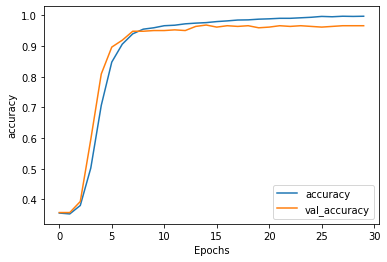

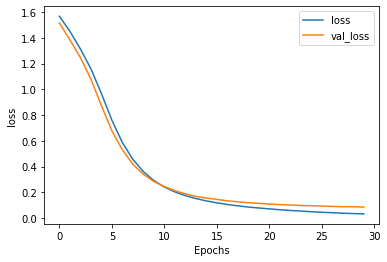

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')